**Step 1: Mount Google Driv** 📂

Mounting Google Drive to access the dataset and saved model files securely from your Colab environment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2: Import Required Libraries** 🧰

Importing essential Python libraries for:

Data processing: pandas, numpy

Visualization: matplotlib

Machine Learning: sklearn

Deep Learning: tensorflow.keras

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

**Step 3: Load Dataset** 📊

Loading the dataset from your drive using pandas.read_csv() to begin the analysis and modeling process.

In [ ]:
# Load data
file_path = "/content/drive/MyDrive/opt data/global_cancer_patients_2015_2024.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=["Patient_ID"])

**Step 4: Inspect & Prepare Data** 🔎

Examining the dataset structure, handling missing values, and performing any necessary cleanup to ensure data quality.

In [ ]:
# Targets and Features
target_cols = ["Treatment_Cost_USD", "Survival_Years", "Target_Severity_Score"]
X = df.drop(columns=target_cols)
y = df[target_cols]

# Feature types
numeric_cols = ["Age", "Genetic_Risk", "Air_Pollution", "Alcohol_Use", "Smoking", "Obesity_Level", "Year"]
categorical_cols = ["Country_Region", "Cancer_Type", "Cancer_Stage"]

**Step 5,6: Data Preprocessing & Split Dataset** ✂️

Creating preprocessing pipelines using:

MinMaxScaler for feature scaling

OneHotEncoder for categorical variables

ColumnTransformer and Pipeline to streamline transformation

Splitting the data into training and testing sets using train_test_split() to evaluate model generalization.



In [ ]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ("gender", OneHotEncoder(drop='if_binary', sparse_output=False), ["Gender"]),
])

X_processed = preprocessor.fit_transform(X)
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

**Step 7: Build Deep Learning Model** 🧠

Using Keras Sequential API to define a multi-layer neural network with:

Dense layers

Dropout layers

Regularization (l2)


In [ ]:
# Build model def
input_dim = X_train.shape[1]
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)),
        Dropout(0.3),  # Dropout to reduce overfitting
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(3, activation='linear')  # Linear output for regression
    ])
    return model


**Step 8: Compile Model** ⚙️

Compiling the model with selected optimizer (e.g., Adam, SGD), loss function (e.g., categorical_crossentropy), and performance metrics (e.g., accuracy).

In [ ]:
optimizers = {
    'SGD': SGD(learning_rate=0.001, momentum=0.9),
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.001)
}

**Step 9: Train Model** 📈

Fitting the model to the training data using model.fit() while tracking validation accuracy and loss across epochs.

In [ ]:
# Train & Evaluate
# Initialize a list to store results
results = []

histories = {}
for name, opt in optimizers.items():
    model = build_model()
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    print(f"Training with {name}...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=200,
        batch_size=64,
        verbose=1
    )
    histories[name] = history

    # Final epoch training metrics
    final_train_loss = history.history['loss'][-1]
    final_train_mae = history.history['mae'][-1]

    # Final epoch validation metrics
    final_val_loss = history.history['val_loss'][-1]
    final_val_mae = history.history['val_mae'][-1]

    # Test evaluation metrics
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    results.append({
        'Optimizer': name,
        'Train Loss (MSE)': final_train_loss,
        'Train MAE': final_train_mae,
        'Validation Loss (MSE)': final_val_loss,
        'Validation MAE': final_val_mae,
        'Test Loss (MSE)': test_loss,
        'Test MAE': test_mae
    })

Training with SGD...
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2285 - mae: 0.3034 - val_loss: 0.1545 - val_mae: 0.2183
Epoch 2/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1644 - mae: 0.2335 - val_loss: 0.1472 - val_mae: 0.2112
Epoch 3/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1513 - mae: 0.2186 - val_loss: 0.1427 - val_mae: 0.2082
Epoch 4/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1449 - mae: 0.2128 - val_loss: 0.1394 - val_mae: 0.2066
Epoch 5/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1404 - mae: 0.2091 - val_loss: 0.1367 - val_mae: 0.2058
Epoch 6/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1375 - mae: 0.2081 - val_loss: 0.1343 - val_mae: 0.2052
Epoch 7/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1344 - mae: 0.2060 - val_loss: 0.1322 - val_mae: 0.2047
Epoch 8/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1323 - mae: 0.2057 - val_loss: 0.1302 - val_mae: 0.2045
Epoch 9/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss:

**Step 10: Evaluate Model** 📉

Testing the trained model on unseen data using model.evaluate() to report loss and accuracy.

In [ ]:
# Create and print DataFrame with all results
results_df = pd.DataFrame(results)
print("\nFinal Evaluation Results:")
print(results_df)


Final Evaluation Results:
  Optimizer  Train Loss (MSE)  Train MAE  Validation Loss (MSE)  \
0       SGD          0.058847   0.189296               0.058896   
1      Adam          0.057763   0.188219               0.057870   
2   RMSprop          0.057875   0.188430               0.058550   
3   Adagrad          0.085886   0.202766               0.083612   

   Validation MAE  Test Loss (MSE)  Test MAE  
0        0.188286         0.058896  0.188286  
1        0.187323         0.057870  0.187323  
2        0.189742         0.058550  0.189742  
3        0.198265         0.083612  0.198265  


**Step 11: Visualize Results** 📊

Plotting training vs validation accuracy/loss curves using matplotlib.pyplot to analyze model behavior over epochs.

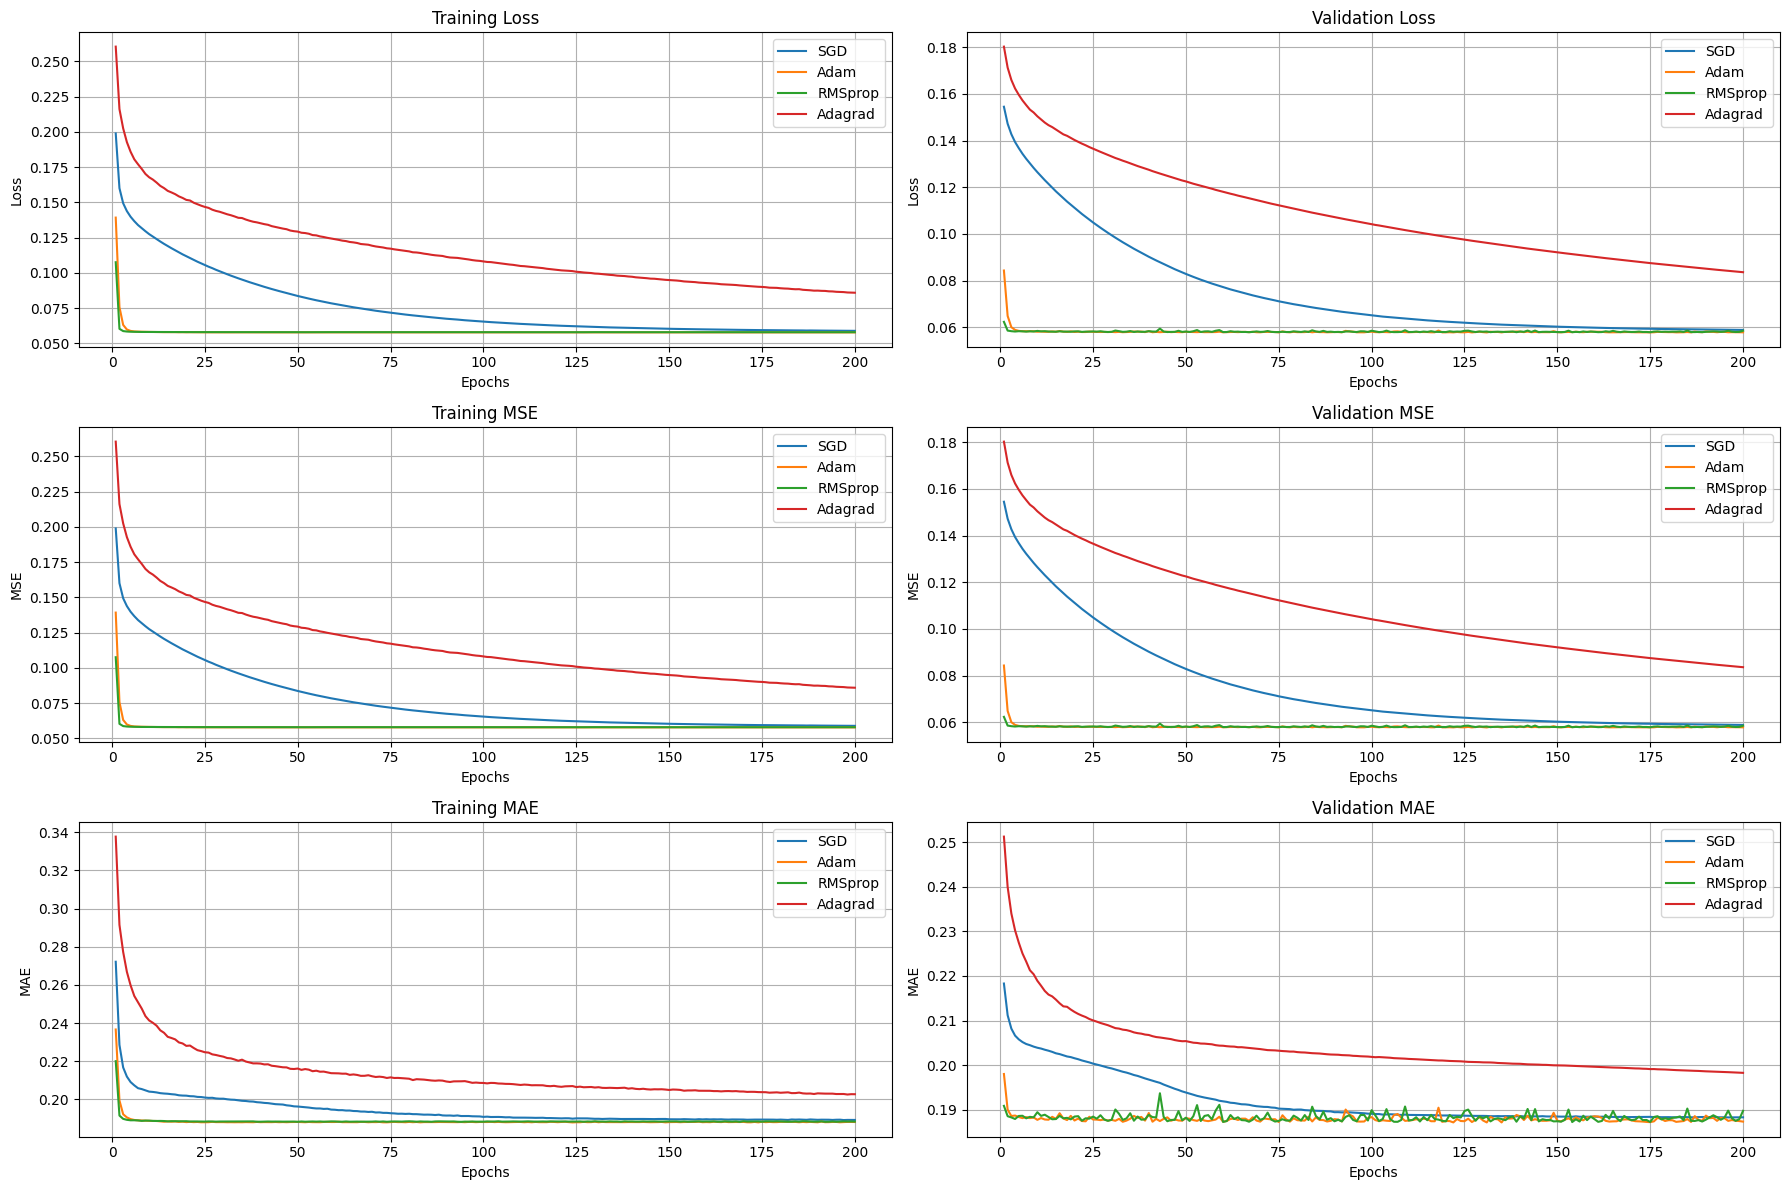

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 201)  # 200 epochs

plt.figure(figsize=(18, 12))

# --- Training Metrics: Loss, MSE, MAE ---

# 1. Training Loss
plt.subplot(3, 2, 1)
for name, history in histories.items():
    plt.plot(epochs, history.history['loss'], label=name)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Training MSE (same as loss, shown separately)
plt.subplot(3, 2, 3)
for name, history in histories.items():
    plt.plot(epochs, history.history['loss'], label=name)
plt.title('Training MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# 3. Training MAE
plt.subplot(3, 2, 5)
for name, history in histories.items():
    plt.plot(epochs, history.history['mae'], label=name)
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# --- Validation Metrics: Loss, MSE, MAE ---

# 4. Validation Loss
plt.subplot(3, 2, 2)
for name, history in histories.items():
    plt.plot(epochs, history.history['val_loss'], label=name)
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 5. Validation MSE (same as val_loss)
plt.subplot(3, 2, 4)
for name, history in histories.items():
    plt.plot(epochs, history.history['val_loss'], label=name)
plt.title('Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# 6. Validation MAE
plt.subplot(3, 2, 6)
for name, history in histories.items():
    plt.plot(epochs, history.history['val_mae'], label=name)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
